In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('income.csv')

In [5]:
data.shape

(22, 3)

In [6]:
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


<Axes: xlabel='Age', ylabel='Income($)'>

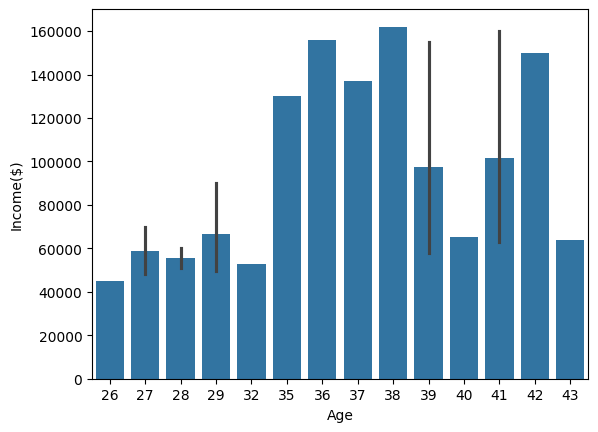

In [10]:
sns.barplot(data=data,x='Age',y='Income($)')

<Axes: ylabel='Income($)'>

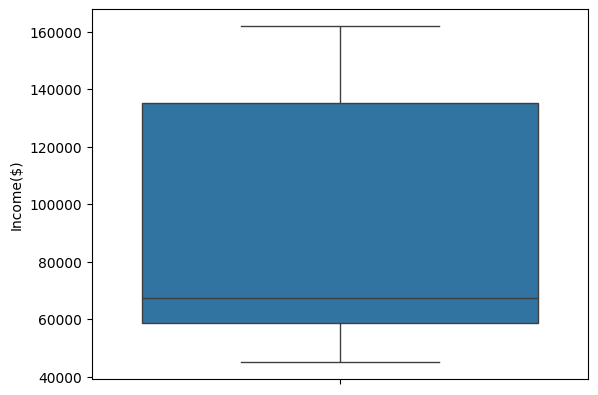

In [11]:
sns.boxplot(data['Income($)'])

<Axes: xlabel='Income($)', ylabel='Density'>

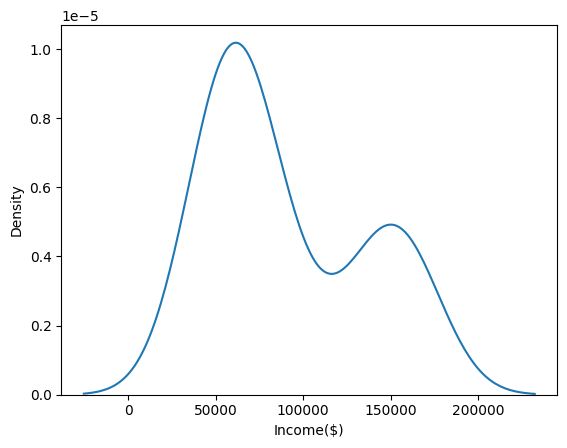

In [12]:
sns.kdeplot(data['Income($)'])

<Axes: ylabel='Age'>

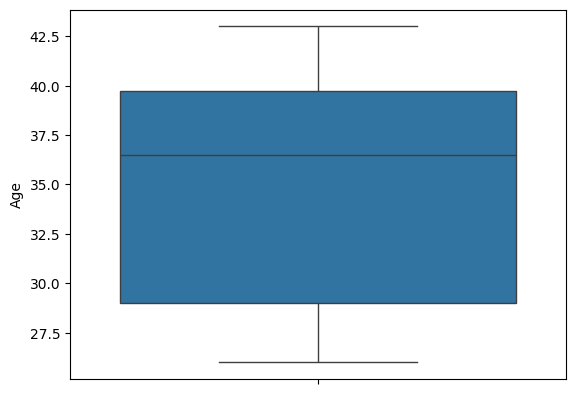

In [14]:
sns.boxplot(data['Age'])

<Axes: xlabel='Age', ylabel='Density'>

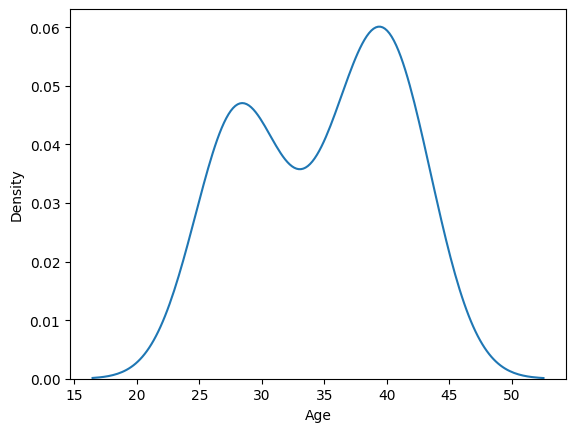

In [15]:
sns.kdeplot(data['Age'])

<Axes: ylabel='Age'>

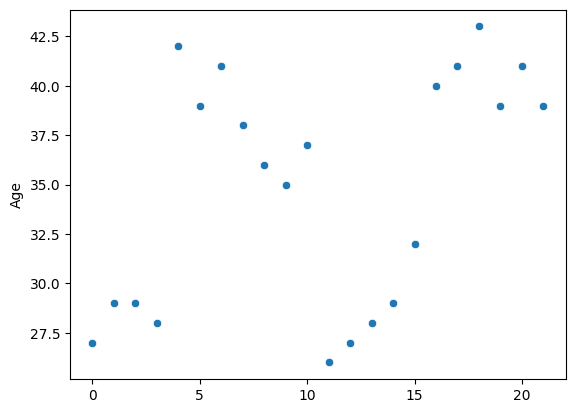

In [16]:
sns.scatterplot(data['Age'])

<Axes: ylabel='Income($)'>

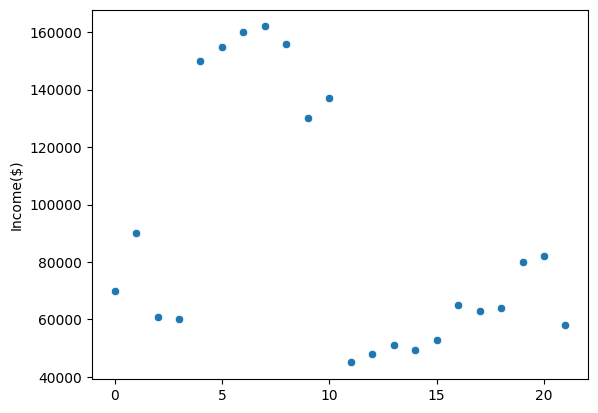

In [17]:
sns.scatterplot(data['Income($)'])

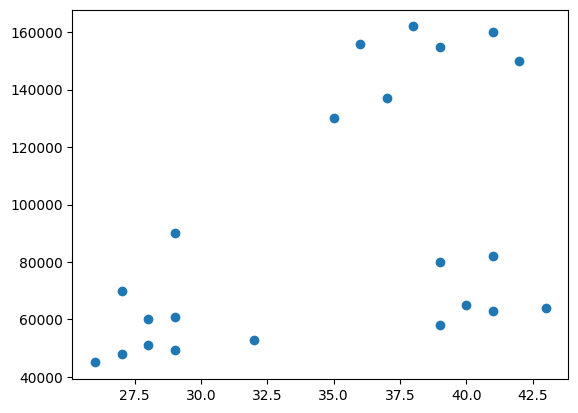

In [19]:
plt.scatter(data.Age,data['Income($)'])

<Axes: xlabel='Age', ylabel='Income($)'>

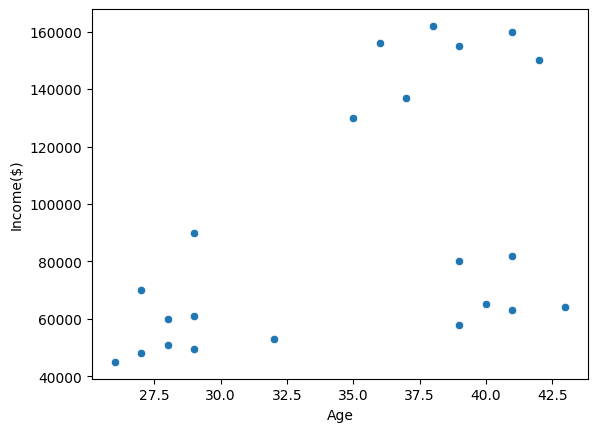

In [20]:
sns.scatterplot(data=data,x='Age',y='Income($)')

In [22]:
data.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

In [84]:
data = data.drop(columns=['Name'])

In [85]:
from sklearn.cluster import KMeans

#### To find K value for Kmeans we must plot elbow plot

In [86]:
sse=[]
k_range=range(1,8)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

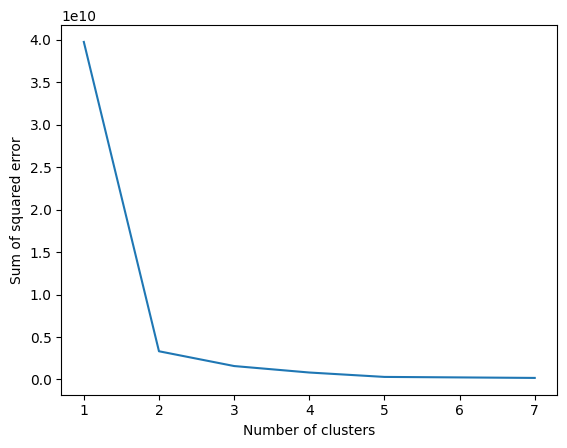

In [87]:
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [88]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(data[['Age','Income($)']])
data['cluster']=y_predicted
data

,Age,Income($),cluster
0,27,70000,2
1,29,90000,2
2,29,61000,1
3,28,60000,1
4,42,150000,0
5,39,155000,0
6,41,160000,0
7,38,162000,0
8,36,156000,0
9,35,130000,0


In [89]:
km.labels_

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [90]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

<Axes: xlabel='Age', ylabel='Income($)'>

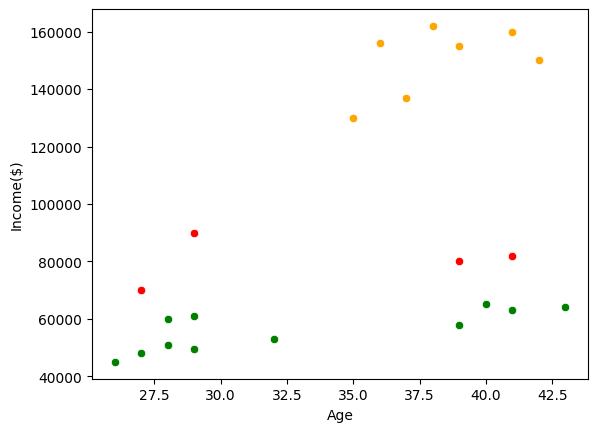

In [91]:
data0 = data[data['cluster'] == 0]
data1 = data[data['cluster'] == 1]
data2 = data[data['cluster'] == 2]

sns.scatterplot(x=data0['Age'],y=data0['Income($)'],color='orange')
sns.scatterplot(x=data1['Age'],y=data1['Income($)'],color='green')
sns.scatterplot(x=data2['Age'],y=data2['Income($)'],color='red')

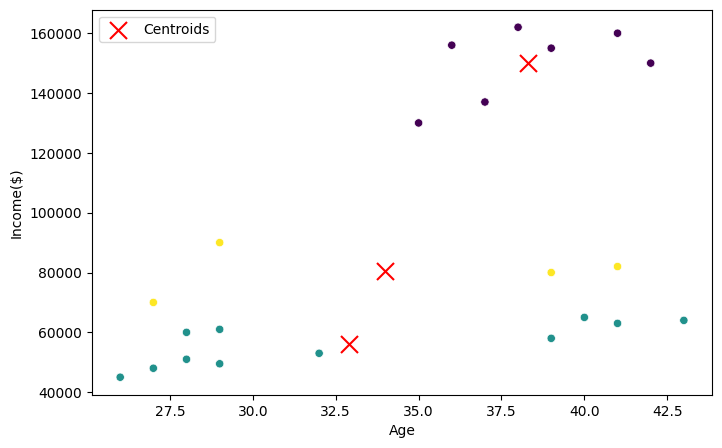

In [93]:
# Scatter plot of the data points
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Income($)', data=data, hue=km.labels_, palette='viridis', legend=False)

# Plotting the centroids
centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150, marker='x', label='Centroids')
plt.legend()
plt.show()

### Clustering after using standard scalar

In [58]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(data)

In [66]:
sse=[]
k_range=range(1,8)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

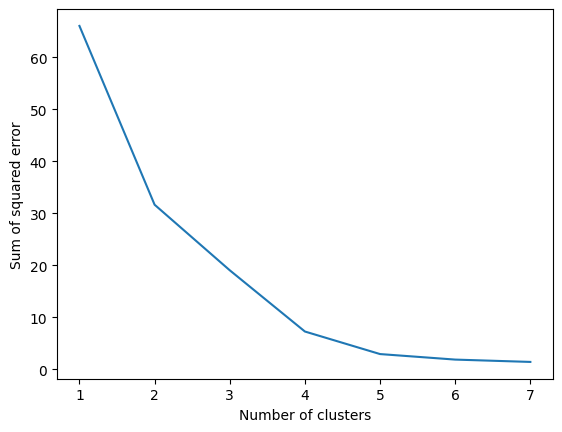

In [67]:
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [73]:
km.labels_

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 3, 3, 4, 4, 4, 4, 4, 1, 1, 1, 2, 2, 1])

<Axes: xlabel='Age', ylabel='Income($)'>

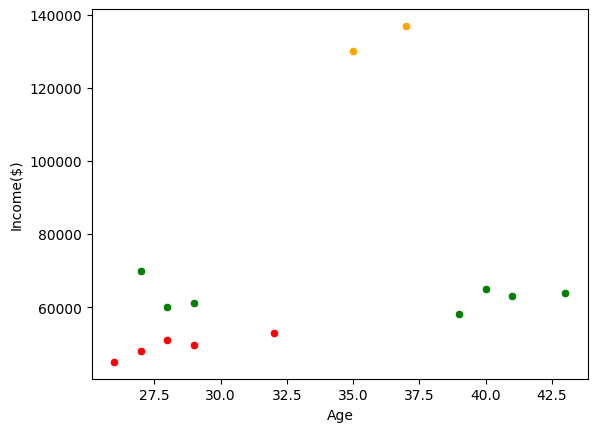

In [75]:
data0 = data[data['cluster'] == 0]
data1 = data[data['cluster'] == 1]
data2 = data[data['cluster'] == 2]
data3 = data[data['cluster'] == 3]
data4 = data[data['cluster'] == 4]

sns.scatterplot(x=data0['Age'],y=data0['Income($)'],color='orange')
sns.scatterplot(x=data1['Age'],y=data1['Income($)'],color='green')
sns.scatterplot(x=data2['Age'],y=data2['Income($)'],color='red')
sns.scatterplot(x=data3['Age'],y=data2['Income($)'],color='blue')
sns.scatterplot(x=data4['Age'],y=data2['Income($)'],color='pink')

### Clustering using hyperparameter tunning

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],  # Testing different numbers of clusters
    'init': ['k-means++', 'random'],  # Testing different initialization methods
    'max_iter': [100, 200, 300]  # Testing different numbers of iterations
}

kmeans = KMeans()
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(data)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 6}


In [81]:
kmeans = KMeans(init="k-means++", n_clusters=2, max_iter=300,n_init=10, random_state=1)
y_predicted=km.fit_predict(data[['Age','Income($)']])
data['cluster']=y_predicted
data

,Age,Income($),cluster
0,27,70000,1
1,29,90000,4
2,29,61000,1
3,28,60000,1
4,42,150000,3
5,39,155000,3
6,41,160000,3
7,38,162000,3
8,36,156000,3
9,35,130000,0


<Axes: xlabel='Age', ylabel='Income($)'>

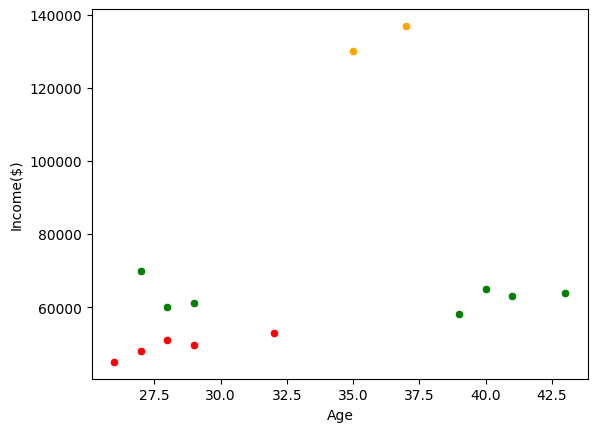

In [82]:

data0 = data[data['cluster'] == 0]
data1 = data[data['cluster'] == 1]
data2 = data[data['cluster'] == 2]
data3 = data[data['cluster'] == 3]
data4 = data[data['cluster'] == 4]

sns.scatterplot(x=data0['Age'],y=data0['Income($)'],color='orange')
sns.scatterplot(x=data1['Age'],y=data1['Income($)'],color='green')
sns.scatterplot(x=data2['Age'],y=data2['Income($)'],color='red')
sns.scatterplot(x=data3['Age'],y=data2['Income($)'],color='blue')
sns.scatterplot(x=data4['Age'],y=data2['Income($)'],color='pink')

## Using Min Max Scaler ( correct way )

In [19]:
df = data.copy(deep=True)

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [21]:
kmeans = KMeans(n_clusters=3)
y_predicted=kmeans.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [22]:
df = df.drop(columns=['Name'])

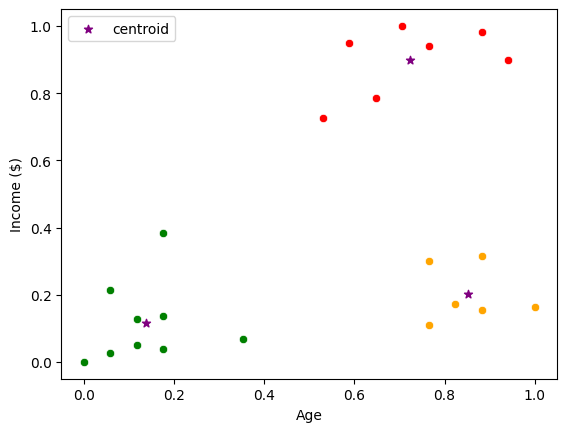

In [23]:
data0 = df[df['cluster'] == 0]
data1 = df[df['cluster'] == 1]
data2 = df[df['cluster'] == 2]


sns.scatterplot(x=data0['Age'],y=data0['Income($)'],color='orange')
sns.scatterplot(x=data1['Age'],y=data1['Income($)'],color='green')
sns.scatterplot(x=data2['Age'],y=data2['Income($)'],color='red')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()


In [24]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

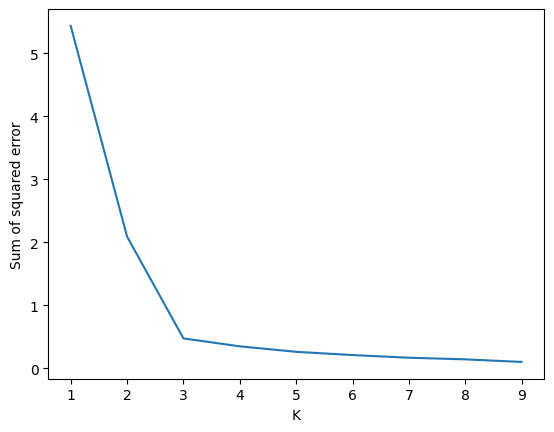

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)